#📌 Extracción

In [31]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Cargar los datos desde el archivo JSON
with open('TelecomX_Data.json', 'r') as f:
    data = json.load(f)

# Convertir a DataFrame
df = pd.json_normalize(data)

#🔧 Transformación

In [32]:
# Renombrar columnas para mayor claridad
df.columns = [col.replace('.', '_') for col in df.columns]

# Verificar valores faltantes
print(df.isnull().sum())

# Eliminar registros con Churn vacío (si los hay)
df = df[df['Churn'].isin(['Yes', 'No'])]

# Convertir SeniorCitizen a booleano
df['customer_SeniorCitizen'] = df['customer_SeniorCitizen'].astype(bool)

# Convertir cargos a numérico
df['account_Charges_Total'] = pd.to_numeric(df['account_Charges_Total'], errors='coerce')

# Crear variable binaria para Churn
df['Churn_bin'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Crear categorías de antigüedad
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-1 año', '1-2 años', '2-3 años', '3-4 años', '4-5 años', '5-6 años']
df['tenure_group'] = pd.cut(df['customer_tenure'], bins=bins, labels=labels, right=False)

customerID                   0
Churn                        0
customer_gender              0
customer_SeniorCitizen       0
customer_Partner             0
customer_Dependents          0
customer_tenure              0
phone_PhoneService           0
phone_MultipleLines          0
internet_InternetService     0
internet_OnlineSecurity      0
internet_OnlineBackup        0
internet_DeviceProtection    0
internet_TechSupport         0
internet_StreamingTV         0
internet_StreamingMovies     0
account_Contract             0
account_PaperlessBilling     0
account_PaymentMethod        0
account_Charges_Monthly      0
account_Charges_Total        0
dtype: int64


#📊 Carga y análisis

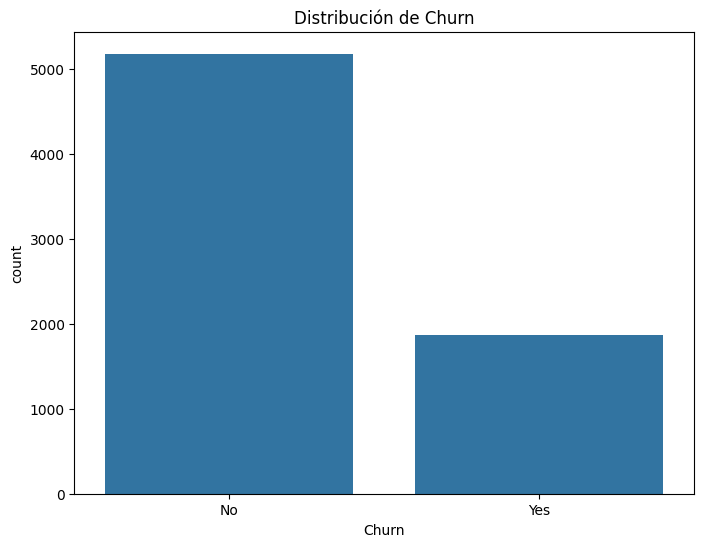

Tasa de Churn: 26.54%


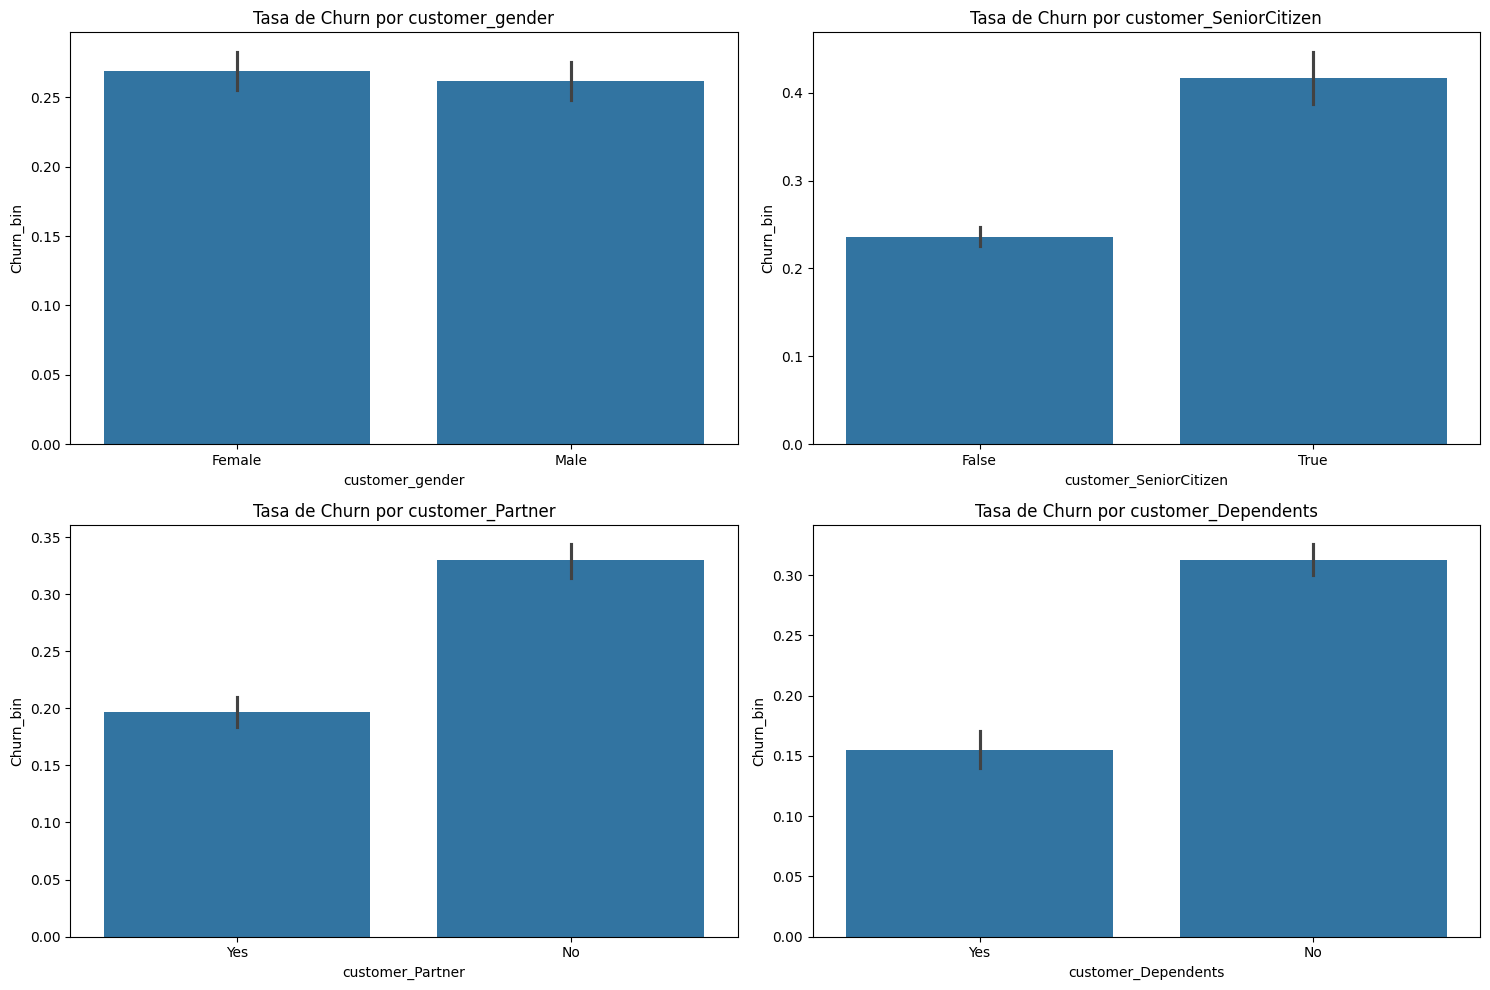

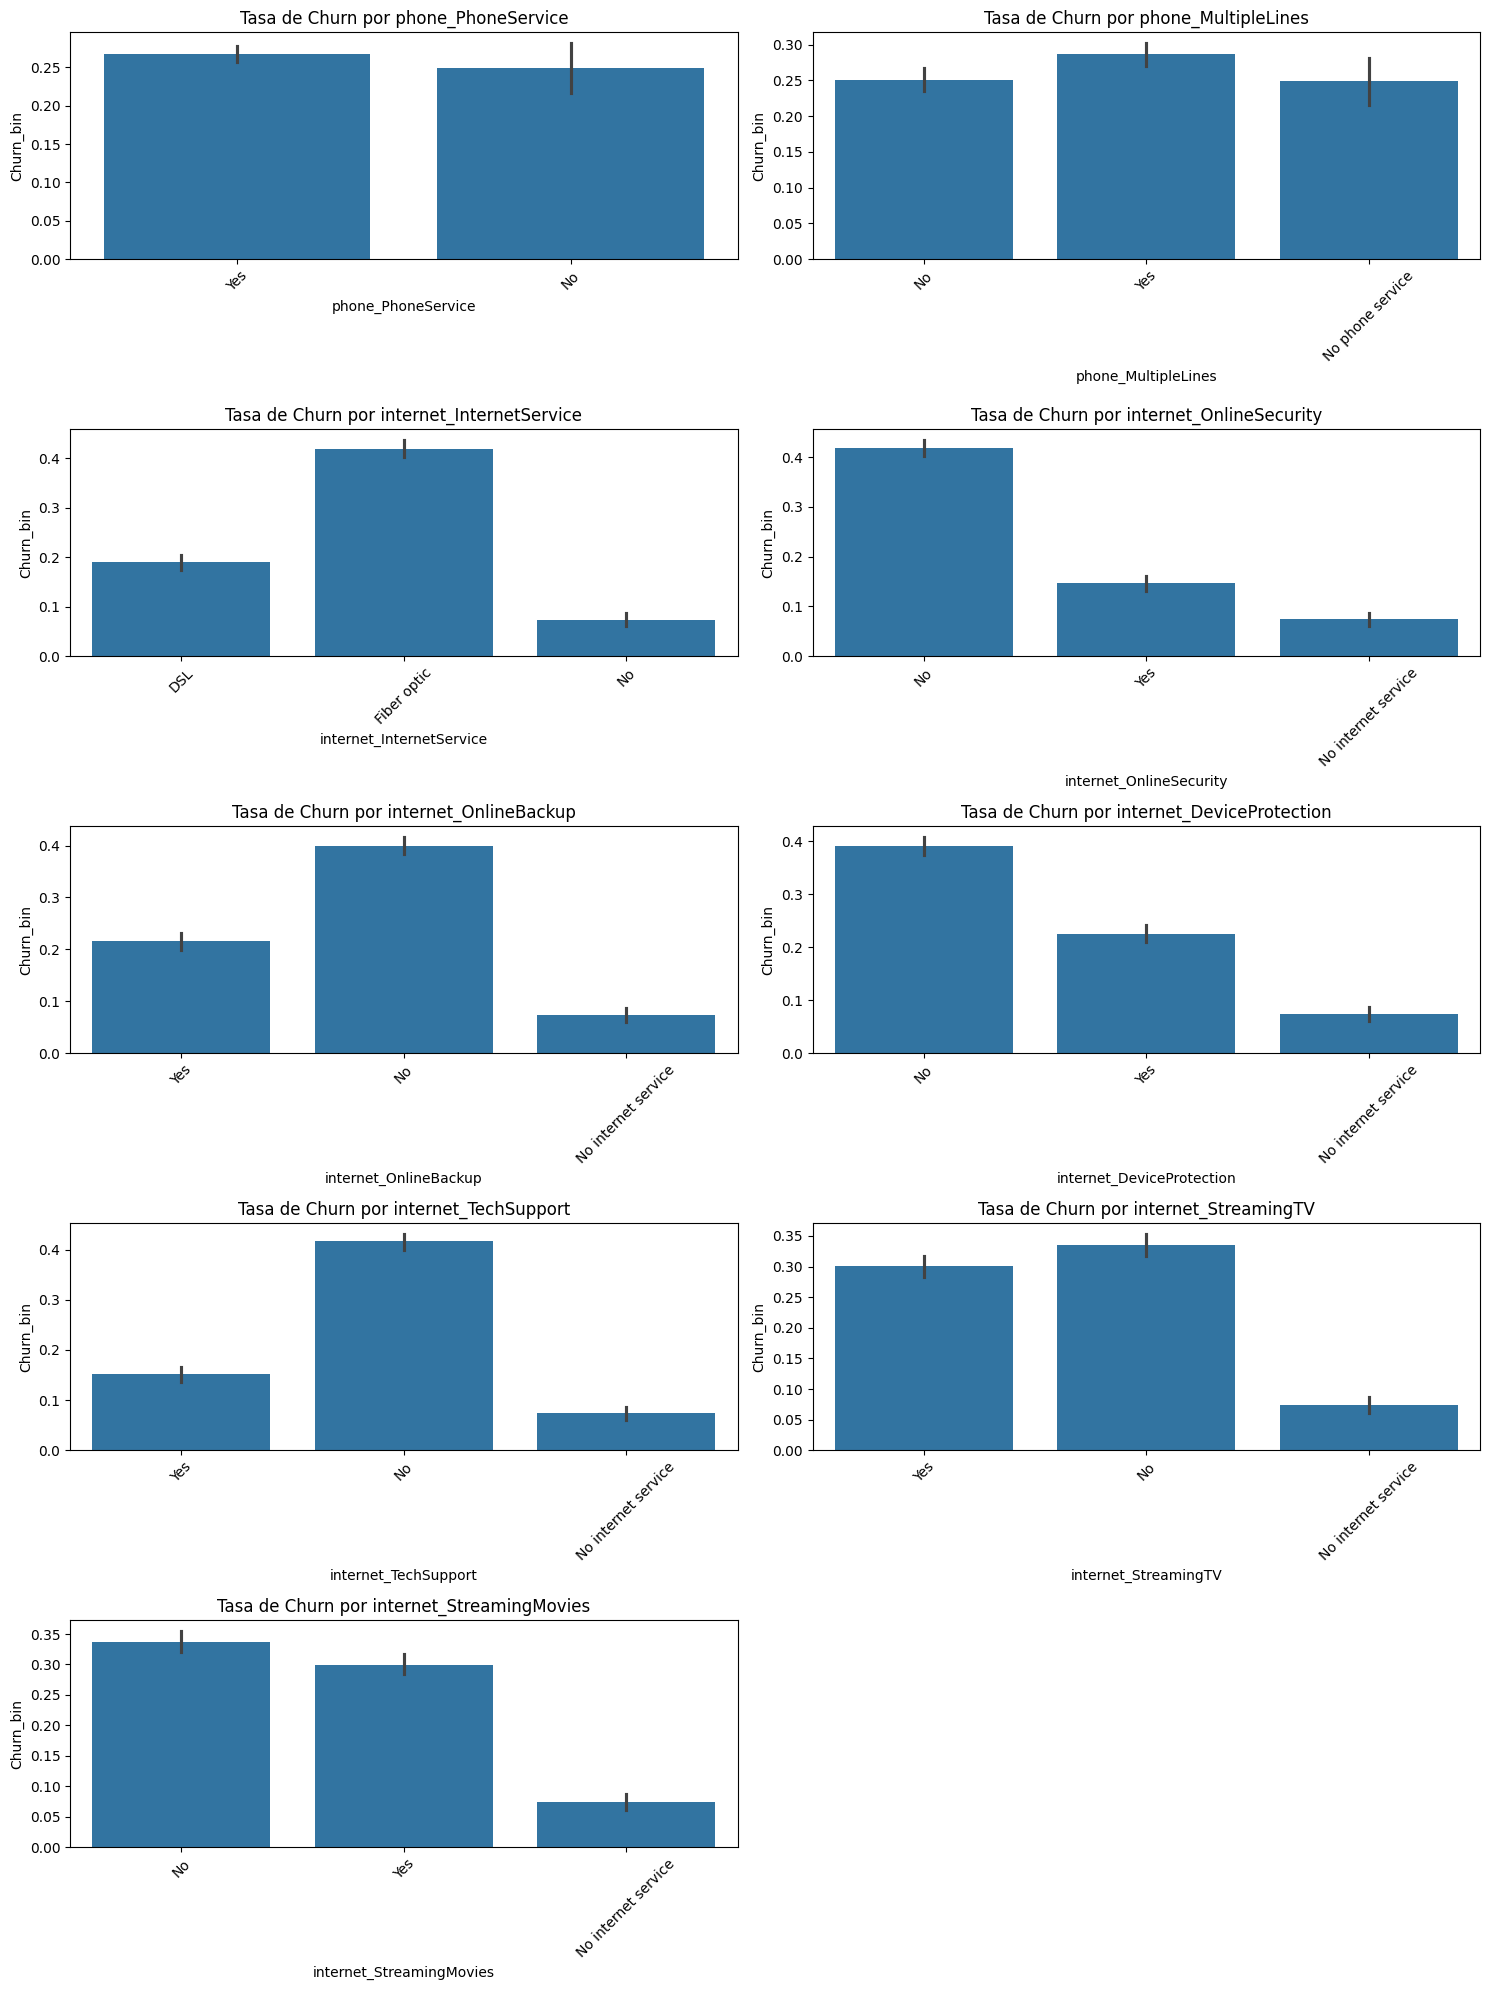

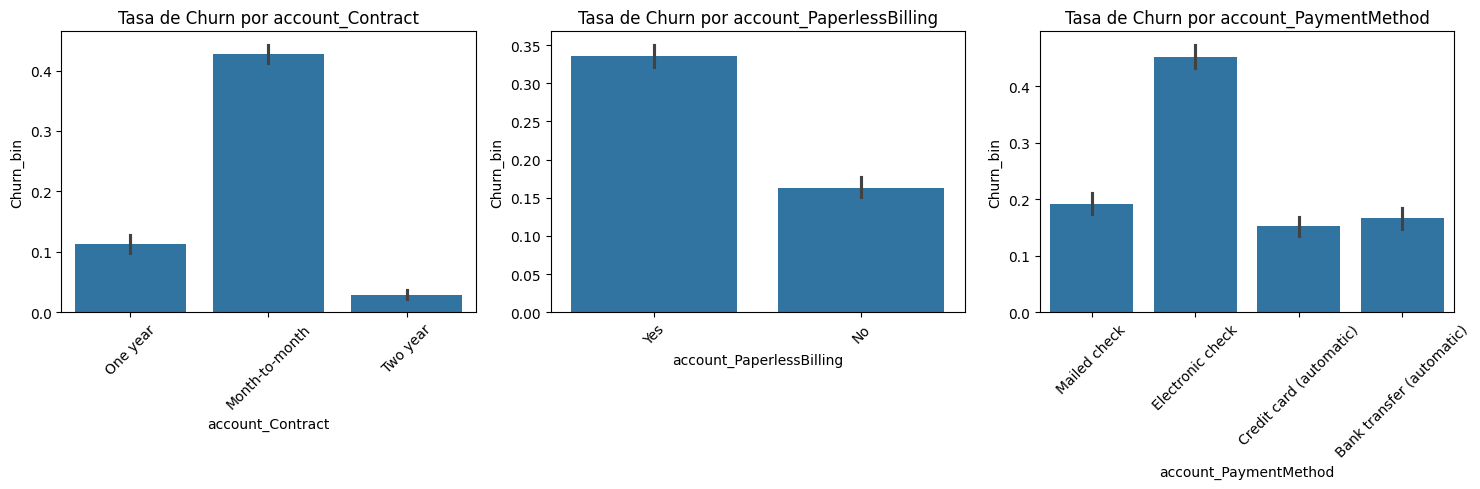

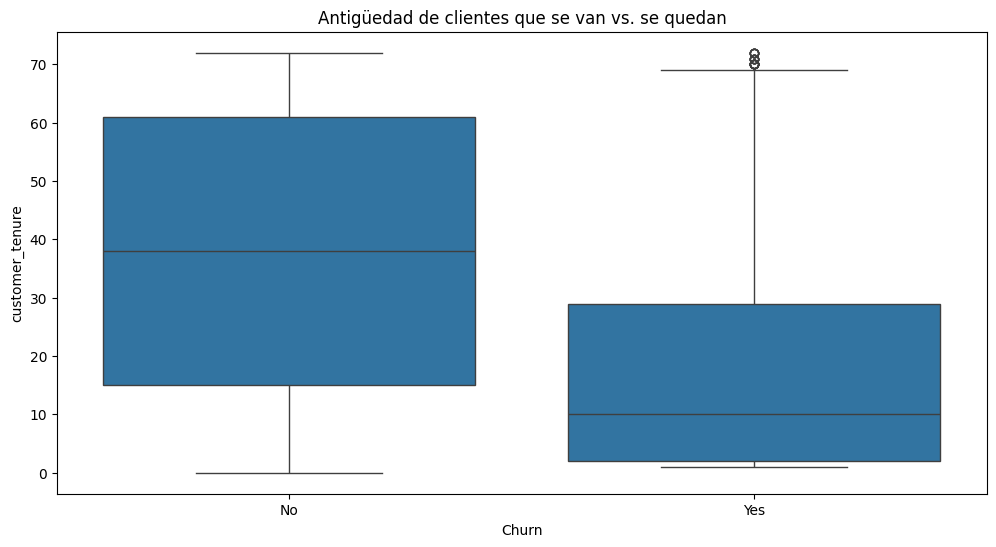

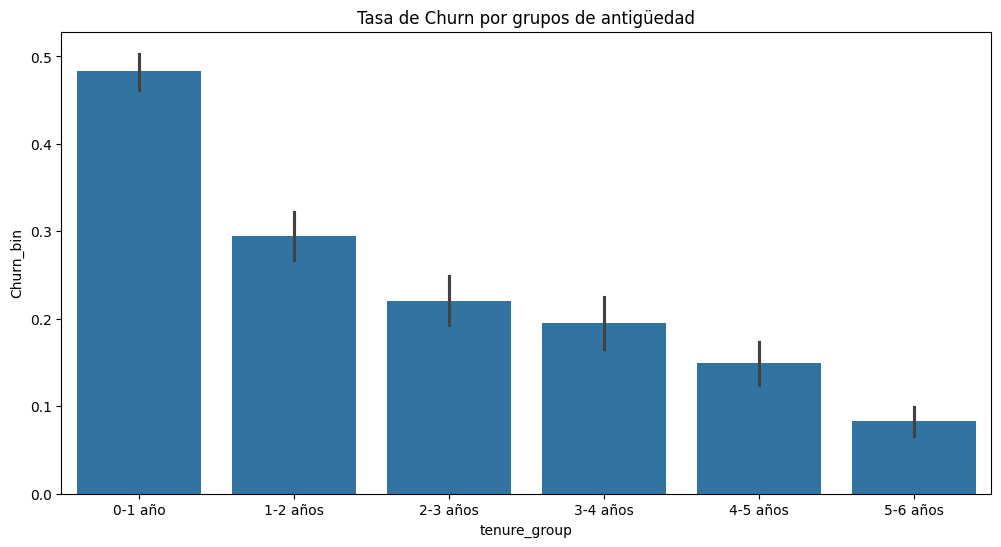

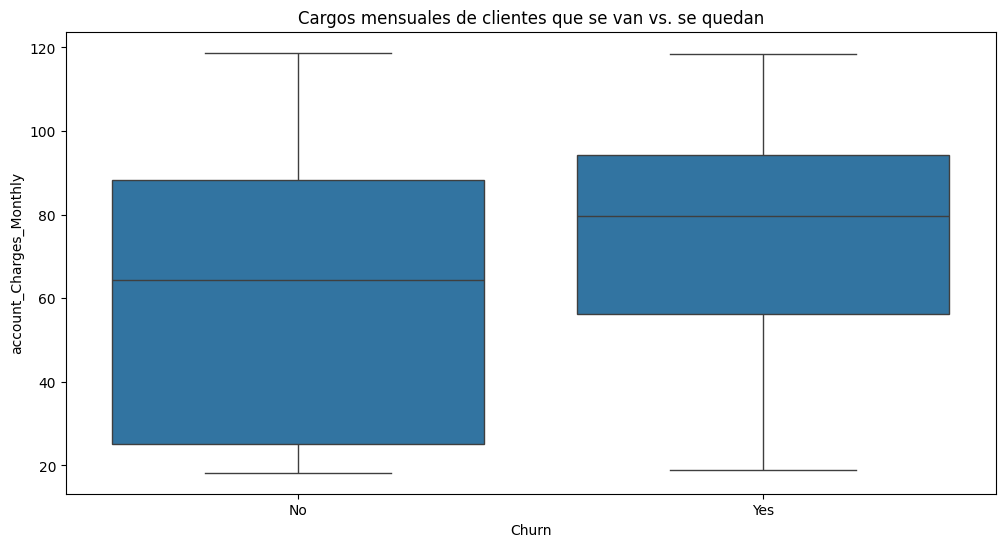

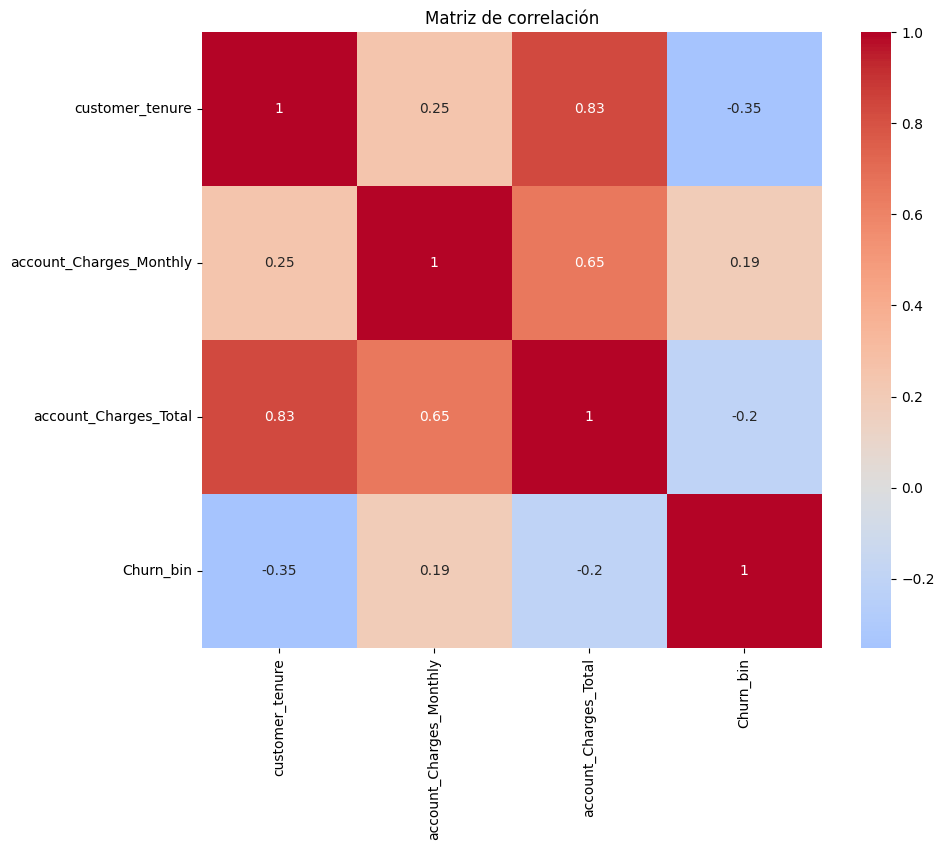

In [33]:
# Distribución de Churn
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()

# Porcentaje de Churn
churn_rate = df['Churn_bin'].mean() * 100
print(f"Tasa de Churn: {churn_rate:.2f}%")

# Análisis por características demográficas
demographic_features = ['customer_gender', 'customer_SeniorCitizen', 'customer_Partner', 'customer_Dependents']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(demographic_features, 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=feature, y='Churn_bin', data=df)
    plt.title(f'Tasa de Churn por {feature}')
plt.tight_layout()
plt.show()

# Análisis por servicios contratados
service_features = ['phone_PhoneService', 'phone_MultipleLines',
                   'internet_InternetService', 'internet_OnlineSecurity',
                   'internet_OnlineBackup', 'internet_DeviceProtection',
                   'internet_TechSupport', 'internet_StreamingTV',
                   'internet_StreamingMovies']

plt.figure(figsize=(15, 20))
for i, feature in enumerate(service_features, 1):
    plt.subplot(5, 2, i)
    sns.barplot(x=feature, y='Churn_bin', data=df)
    plt.title(f'Tasa de Churn por {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis por tipo de contrato y facturación
account_features = ['account_Contract', 'account_PaperlessBilling', 'account_PaymentMethod']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(account_features, 1):
    plt.subplot(1, 3, i)
    sns.barplot(x=feature, y='Churn_bin', data=df)
    plt.title(f'Tasa de Churn por {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Relación entre antigüedad y Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='customer_tenure', data=df)
plt.title('Antigüedad de clientes que se van vs. se quedan')
plt.show()

# Tasa de Churn por grupos de antigüedad
plt.figure(figsize=(12, 6))
sns.barplot(x='tenure_group', y='Churn_bin', data=df)
plt.title('Tasa de Churn por grupos de antigüedad')
plt.show()

# Relación entre cargos mensuales y Churn
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='account_Charges_Monthly', data=df)
plt.title('Cargos mensuales de clientes que se van vs. se quedan')
plt.show()

# Correlación entre variables numéricas
numeric_features = ['customer_tenure', 'account_Charges_Monthly', 'account_Charges_Total', 'Churn_bin']
corr_matrix = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación')
plt.show()

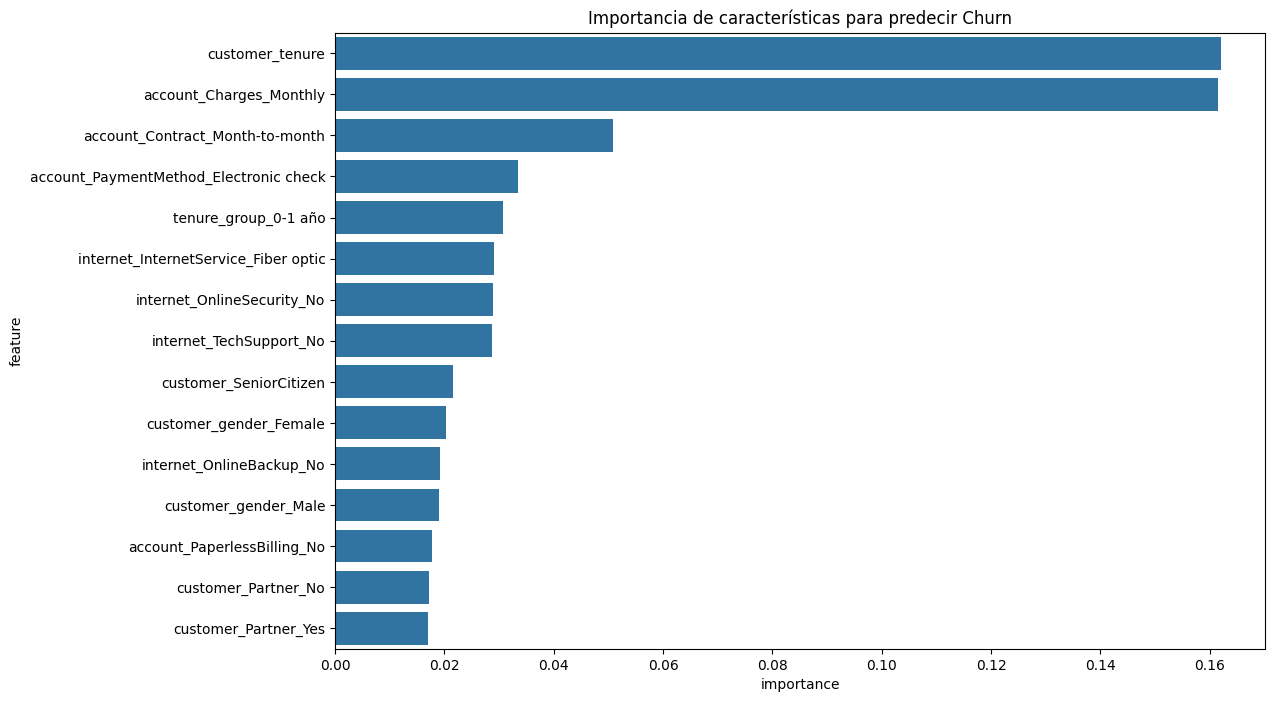

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Preparar datos para modelo
X = pd.get_dummies(df.drop(['customerID', 'Churn', 'Churn_bin', 'account_Charges_Total'], axis=1))
y = df['Churn_bin']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar modelo Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Importancia de características
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importances = feature_importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.head(15))
plt.title('Importancia de características para predecir Churn')
plt.show()

#📄Informe final

In [ ]:
#Informe Final con Hallazgos y Recomendaciones

#Principales Hallazgos:
#Factores Demográficos:

los clientes senior tienen una tasa de churn más alta.

los clientes sin pareja (Partner='No') tienen mayor probabilidad de irse.

los clientes sin dependientes (Dependents='No') tienden a abandonar más.

servicios contratados:

los clientes con servicio de Fibra Óptica tienen mayor tasa de churn.

la falta de servicios adicionales como Online Security, Tech Support y Device Protection está asociada con mayor churn.

los clientes con contratos mes a mes tienen la mayor tasa de churn.

factores financieros:

los clientes que pagan más mensualmente tienen mayor probabilidad de irse.

los métodos de pago electrónicos están asociados con mayor churn.

#Antigüedad:

los clientes más nuevos (menos de 12 meses) tienen la mayor tasa de churn.

la antigüedad está inversamente correlacionada con la probabilidad de churn.

#Recomendaciones para Reducir el Churn:
#Mejorar la Retención de Clientes Nuevos:

implementar programas de onboarding para nuevos clientes.

ofrecer incentivos para clientes que llegan al año de antigüedad.

#optimizar los Planes de Servicio:

revisar los precios de los planes de Fibra Óptica.

promover paquetes que incluyan servicios de seguridad y soporte técnico.

#mejorar los Contratos:

incentivar la migración de contratos mes a mes a contratos anuales.

ofrecer descuentos por compromisos a largo plazo.

#programas para Grupos de Alto Riesgo:

desarrollar programas especiales para clientes senior.

crear ofertas personalizadas para clientes sin pareja o dependientes.

#mejorar la Experiencia del Cliente:

implementar programas de satisfacción y lealtad.

mejorar el soporte técnico y la atención al cliente.

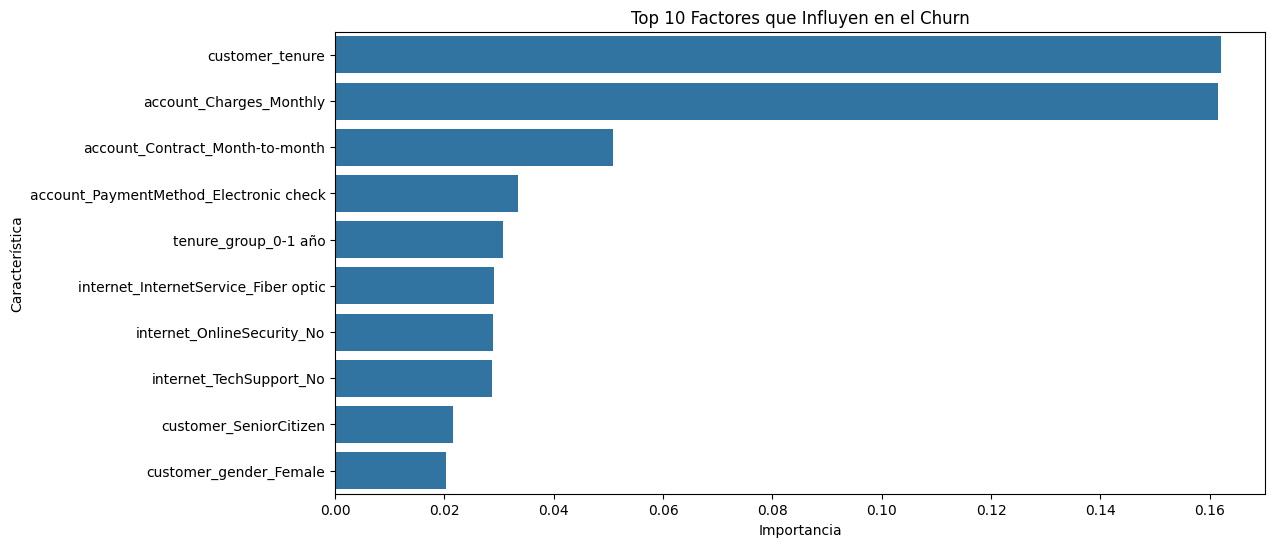

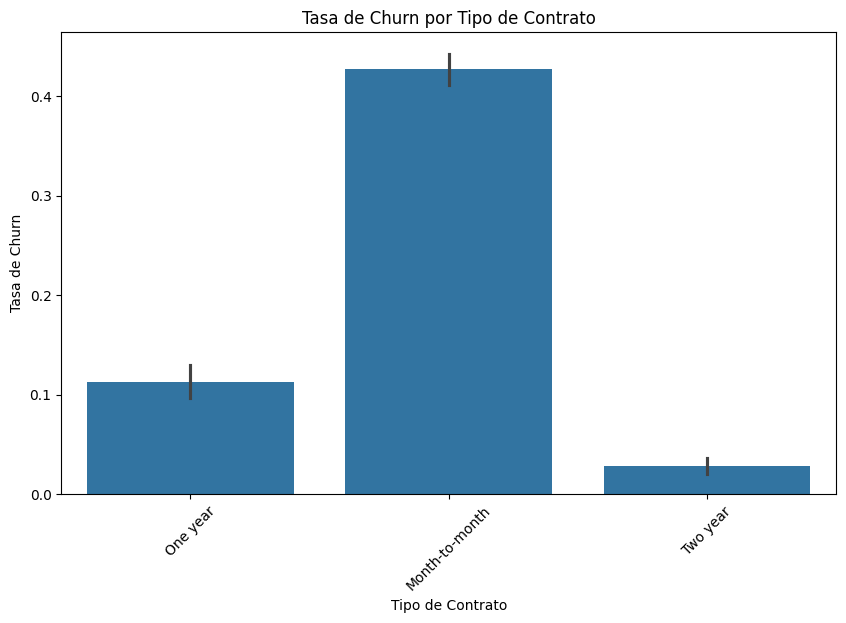

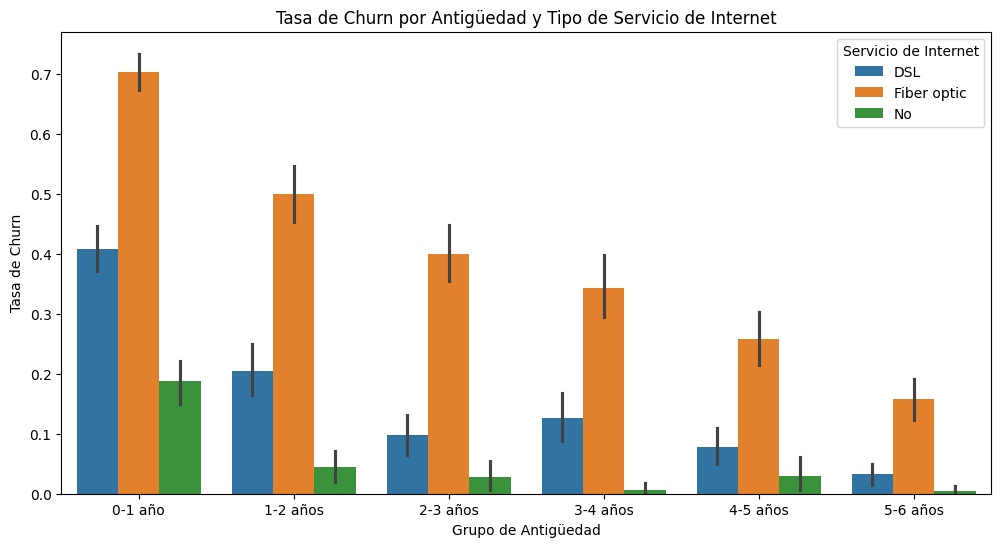

In [35]:
# Gráfico de los principales factores de churn
top_features = feature_importances.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=top_features)
plt.title('Top 10 Factores que Influyen en el Churn')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()

# Comparación de churn por tipo de contrato
plt.figure(figsize=(10, 6))
sns.barplot(x='account_Contract', y='Churn_bin', data=df)
plt.title('Tasa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Tasa de Churn')
plt.xticks(rotation=45)
plt.show()

# Churn por antigüedad y tipo de servicio de internet
plt.figure(figsize=(12, 6))
sns.barplot(x='tenure_group', y='Churn_bin', hue='internet_InternetService', data=df)
plt.title('Tasa de Churn por Antigüedad y Tipo de Servicio de Internet')
plt.xlabel('Grupo de Antigüedad')
plt.ylabel('Tasa de Churn')
plt.legend(title='Servicio de Internet')
plt.show()